## Atividade avaliativa exigida pela disciplina de programação de computadores

In [5]:
import math

In [6]:

#populando o dicionario daily
def populateByDay(path):
    daily = {}
    with open(f'{path}') as f:
        for i in f:
            linha = i.rstrip().replace(' ', '').split(';')

            if(linha[0] in daily.keys()):
                if(linha[1] in daily[linha[0]].keys()):
                    daily[linha[0]][linha[1]][linha[2]] = {
                        'total':linha[4],
                        'std':linha[5],
                        'numberOfObservations':linha[6]
                    }
                else:
                    daily[linha[0]][linha[1]] = {}
                    daily[linha[0]][linha[1]][linha[2]] = {
                        'total':linha[4],
                        'std':linha[5],
                        'numberOfObservations':linha[6]
                    }
            else:
                daily[linha[0]] = {}
                daily[linha[0]][linha[1]] = {}
                daily[linha[0]][linha[1]][linha[2]] = {
                        'total':linha[4],
                        'std':linha[5],
                        'numberOfObservations':linha[6]
                    }
        
        return daily
            


In [7]:
#populando o dicionario monthly
def populateByMonth(path):
    monthly = {}
    with open(f'{path}') as f:
        for i in f:
            linha = i.rstrip().replace(' ', '').split(';')

            if(linha[0] in monthly.keys()):
                monthly[linha[0]][linha[1]] = {
                    'total': linha[3],
                    'std': linha[4],
                    'numberOfObservations':linha[5]
                }
            else:
                monthly[linha[0]] = {}
                monthly[linha[0]][linha[1]] = {
                    'total': linha[3],
                    'std': linha[4],
                    'numberOfObservations':linha[5]
                }
    return monthly

In [8]:
daily = populateByDay('./byDayCsv.csv')
monthly = populateByMonth('./byMonthCsv.csv')

In [9]:
def nonSpotInMonth(daily, year):
    year = daily[year]
    values = {}
    count = 0
    
    for key, value in year.items():
        values[key] = {
            'totalDaysWithoutSpot':0
        }
        for keyDay, valueDay in value.items():
            if(valueDay['total'] == '0'):
                values[key]['totalDaysWithoutSpot'] = values[key]['totalDaysWithoutSpot'] + 1
    return values
            
        

In [10]:
nonSpotInMonth(daily, '1818')

{'01': {'totalDaysWithoutSpot': 0},
 '02': {'totalDaysWithoutSpot': 6},
 '03': {'totalDaysWithoutSpot': 2},
 '04': {'totalDaysWithoutSpot': 0},
 '05': {'totalDaysWithoutSpot': 0},
 '06': {'totalDaysWithoutSpot': 0},
 '07': {'totalDaysWithoutSpot': 0},
 '08': {'totalDaysWithoutSpot': 0},
 '09': {'totalDaysWithoutSpot': 0},
 '10': {'totalDaysWithoutSpot': 0},
 '11': {'totalDaysWithoutSpot': 3},
 '12': {'totalDaysWithoutSpot': 3}}

In [11]:
def mostDaysWithoutSpot(daily):
    data = {
        'year': '',
        'month':'',
        'daysWithoutSpot': 0
    }
    count = 0
    month = ''
    for key, value in daily.items():
        for keyMonth, daysValues in value.items():
            for keyDay, dayValue in daysValues.items():
                if(dayValue['total'] == '0' or dayValue['total'] == '-1'):
                    count = count + 1
            if(data['daysWithoutSpot'] < count):
                data['month'] = keyMonth
                data['daysWithoutSpot'] = count
                data['year'] = key
                
            count = 0
    return data

In [12]:
mostDaysWithoutSpot(daily)

{'year': '1822', 'month': '01', 'daysWithoutSpot': 31}

In [13]:
def mostDaysWithSpot(daily):
    data = {
        'year': '',
        'month':'',
        'daysWithSpot': 0,
        
    }
    count = 0
    month = ''
    for key, value in daily.items():
        for keyMonth, daysValues in value.items():
            for keyDay, dayValue in daysValues.items():
                if(dayValue['total'] != '0' and dayValue['total'] != '-1'):
                    count = count + 1
            if(data['daysWithSpot'] < count):
                data['month'] = keyMonth
                data['daysWithSpot'] = count
                data['year'] = key
            
            count = 0
    return data

In [14]:
mostDaysWithSpot(daily)

{'year': '1827', 'month': '07', 'daysWithSpot': 31}

In [15]:
def maxByInterval(start, end, startMoth, endMonth, daily):
    maximum = {
        'year':0,
        'month':0,
        'day':0,
        'max':0
    }
    minimum = {
        'year':0,
        'month':0,
        'day':0,
        'minimum':999999999999
    }
    for i in range(start, end):
        year = daily[str(i)]
        for monthKey, monthValue in year.items():
            if(int(monthKey) >= startMoth or i > start):
                for dayKey, dayValue in monthValue.items():
                    if(int(dayValue['total']) > int(maximum['max'])):
                        maximum['year'] = str(i)
                        maximum['month'] = monthKey
                        maximum['day'] = dayKey
                        maximum['max'] = dayValue['total']
                    elif(int(dayValue['total']) < int(minimum['minimum'])):
                        minimum['year'] = str(i)
                        minimum['month'] = monthKey
                        minimum['day'] = dayKey
                        minimum['minimum'] = dayValue['total']
                if(int(monthKey) > end):
                    break
                
    return {
        'maximum':maximum,
        'minimum':minimum
    }

In [16]:
maxByInterval(1900,1958,1,1,daily)

{'maximum': {'year': '1957', 'month': '12', 'day': '24', 'max': '503'},
 'minimum': {'year': '1900', 'month': '01', 'day': '04', 'minimum': '0'}}

## Duas funções diferentes. Uma pega a média pelo arquivo de médias, a segunda calcula pelos dias no arquivo de dias

In [17]:
def monthlyMeanByYear(monthly, year):
    means = {}
    year = monthly[year]
    for key, value in year.items():
        means[key] = value['total']
    return means

In [18]:
monthlyMeanByYear(monthly, '1818')

{'01': '58.1',
 '02': '37.4',
 '03': '42.4',
 '04': '57.5',
 '05': '88.5',
 '06': '60.8',
 '07': '46.8',
 '08': '52.6',
 '09': '43.4',
 '10': '52.8',
 '11': '18.3',
 '12': '43.0'}

In [19]:
def monthlyMeanByYearDay(daily, year):
    #pegar soma do total de manchas em um determinado mês e dividir pela quantidade de dias no mês
    #fazer isso para o restante dos meses
    
    year = daily[year]
    
    totalDays = 0
    totalSpots = 0
    
    means = {}
    
    for monthKey, monthDays in year.items():
        for dayKey, dayValue in monthDays.items():
            if(dayValue['total'] != '-1'):
                totalSpots = totalSpots + int(dayValue['total'])
                totalDays = totalDays + 1
        means[monthKey] = totalSpots/totalDays
        totalDays = 0
        totalSpots = 0
    return means

In [20]:
monthlyMeanByYearDay(daily, '1818')

{'01': 58.125,
 '02': 37.42857142857143,
 '03': 42.357142857142854,
 '04': 57.523809523809526,
 '05': 88.48,
 '06': 60.8,
 '07': 46.76190476190476,
 '08': 52.55,
 '09': 43.388888888888886,
 '10': 52.77272727272727,
 '11': 18.333333333333332,
 '12': 43.0}

In [21]:
def stdByMothlyObservation(monthly):
    std = {}
    
    nSigma = []
    n = 0
    
    
    
    for yearKey, yearMonth in monthly.items():
        std[yearKey] = {}
        for monthKey, monthValue in yearMonth.items():
            
            for dayKey, dayValue in monthValue.items():
                nSigma.append(int(dayValue['numberOfObservations']) * (float(dayValue['std']) ** 2))
                n = n + int(dayValue['numberOfObservations'])
            if(n != 0):
                std[yearKey][monthKey] = {
                    'std':math.sqrt(sum(nSigma)/n)
                }
            else:
                std[yearKey][monthKey] = {
                    'std':-1
                }
                
            n = 0
            nSigma = []
    return std

## Pegar média suave em intervalo de anos

In [22]:
import itertools

In [158]:
def smoothedMeanByInterval(start, end, monthly):
    a = {}
    
    months = []
    
    means=[]
    
    result = {}
    
    years = list(monthly.keys())
    yearStart = int(years[0])
    yearEnd = int(years[len(years)-1])

    for key, value in monthly.items():
        if(int(key) >= start-1 and int(key) <= end+1):
            if(int(key) >= start and int(key) <= end):
                result[key] = []
            for monthKey, monthValue in value.items():
                #if(key in result.keys()):
                    #result[key][monthKey] = {
                        #'smoothedMean':0
                    #}
                months.append(float(monthValue['total']))
    print(len(months))

    if(start > yearStart and end+1 == yearEnd):
        for i in range(12, len(months) -10):
            means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)
    elif(start > yearStart and end < yearEnd):
        for i in range(12, len(months) -12):
            means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)    
    elif(start == yearStart and end < yearEnd):
        for i in range(6, len(months) -12):
            means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)
    elif(start > yearStart and end == yearEnd):
        for i in range(12, len(months) -6):
            means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)
    else:
        for i in range(6, len(months) -6):
            means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)

    print(len(means))
    
    for key, value in result.items():
        if(int(key) == yearStart):
            for i in range(6, 12):
                result[key].append(means.pop(0))
        elif(int(key) == yearEnd):
            for i in range(4):
                result[key].append(means.pop(0))
        else:
            for i in range(12):
                result[key].append(means.pop(0))
        #for monthKey, monthValue in value.items():
            #result[key][monthKey]['smoothedMean'] = means.pop(0)
    
    return result

In [159]:
means = smoothedMeanByInterval(2010,2021,monthly)

166
144


In [58]:
import matplotlib.pyplot as plt

In [162]:
def dataForGraph(daily, monthly, start, end):
    dayY = []
    monthY = []
    for key, value in daily.items():
        if(int(key) >= start and int(key) <= end):
            for monthKey, monthValue in value.items():
                for dayKey, dayValue in monthValue.items():
                    dayY.append(int(dayValue['total']))
                    
    
    
    for key, value in monthly.items():
        if(int(key) >= start and int(key) <= end):
            for monthKey, monthValue in value.items():
                monthY.append(float(monthValue['total']))
    
    smoothed = smoothedMeanByInterval(start,end,monthly)
    smoothedY = []
    for key, value in smoothed.items():
        smoothedY.extend(value)
    
    return {
        'day':dayY,
        'month':monthY,
        'smoothed':smoothedY
    }
                

In [167]:
data = dataForGraph(daily, monthly, 1900, 2000)

1236
1212


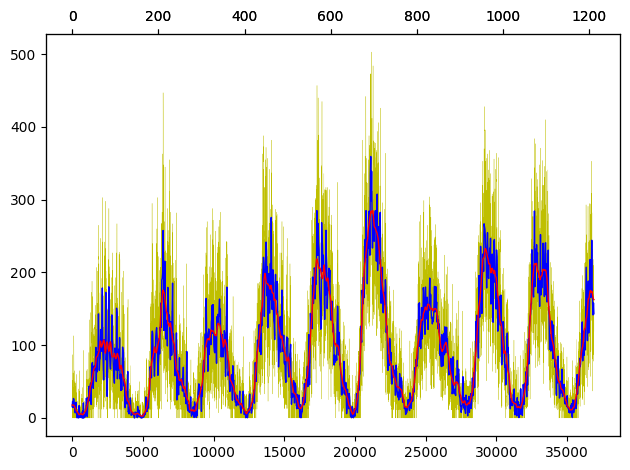

In [168]:
fig, ax = plt.subplots()
ax.set_aspect('auto')
ax.plot(data['day'], linewidth=.2, color="y")

ax2 = ax.twiny()
ax2.plot(data['month'], linewidth=1, color="b")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax3 = ax.twiny()
ax3.plot(data['smoothed'], linewidth=1, color="r")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()